In this session, I plan do some text analysis about the Review text. In the final part, I plan to build a text classifier using encoding techniques.

I will be focusing on the following things.
* How is the text related to the positive feedback count/ recommended?
* Can we build a classifier based on this text --> recommend?


## Dataset:
The dataset comes from kaggle's [Women review of clothes](https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews/downloads/womens-ecommerce-clothing-reviews.zip/1)

## Why I choose Kaggle's dataset?
* I am too lasy to collect my own :). 
* It is really time consuming and annoying to collect data with such high quality and quantity 



## TODO
* concatenate different Review text by ID
* EDAs upon Text and the data

## Task
For each review text, I will try to build a classifier in telling whether this text suggest us to recommend or not.

In [189]:
## Import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# EDAs
I will look into some of the basic features like distribution, unique values..., etc.

In [146]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
Unnamed: 0                 23486 non-null int64
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [148]:
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


Since we are mostly dealing with text or categorical data, not Interval data. It seems useless to summarize the int data with statistics.

In [149]:
df[["Title", "Division Name","Department Name","Class Name"]].describe(include=["O"]).T.drop("count",axis=1)

,unique,top,freq
Title,13993,Love it!,136
Division Name,3,General,13850
Department Name,6,Tops,10468
Class Name,20,Dresses,6319


## Ages:
Now as previous mentioned, we will focus on different age groups see how their response differs.

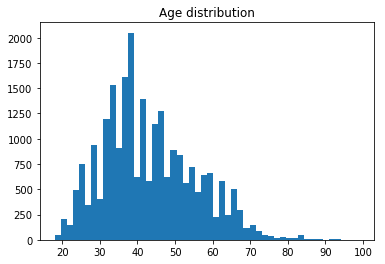

count    23486.000000
mean        43.198544
std         12.279544
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Age, dtype: float64

In [150]:
ages = df["Age"]
plt.hist(ages,bins=50)
plt.title("Age distribution")
plt.show()
ages.describe()

It seems to me that this follows a normal distribution of age. What we might found interesting is the 50% quantile of the response. I thought it might be some age close to 30- 35 but it turns out to be some age close to 41.

## Positive Feedback count


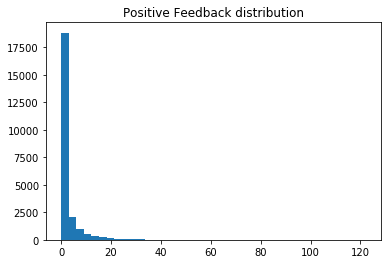

In [151]:
plt.hist(df["Positive Feedback Count"],bins=40)
plt.title("Positive Feedback distribution")
plt.show()

## Ratings Distribution

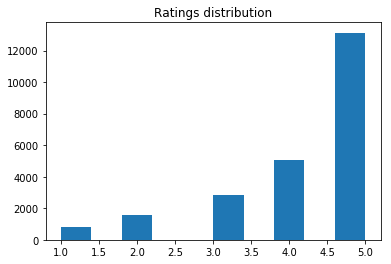

In [152]:
ratings = df["Rating"]
plt.hist(ratings)
plt.title("Ratings distribution")
plt.show()

From the distribution of ratings, we see that the majority of the ratings are more than 4 points.

In [153]:
for i in df:
    print(i,'has different unique values:',len(set(df[i][:])))    

Unnamed: 0 has different unique values: 23486
Clothing ID has different unique values: 1206
Age has different unique values: 77
Title has different unique values: 13994
Review Text has different unique values: 22635
Rating has different unique values: 5
Recommended IND has different unique values: 2
Positive Feedback Count has different unique values: 82
Division Name has different unique values: 4
Department Name has different unique values: 7
Class Name has different unique values: 21


## Goal
I want to try to find out what are some features that might exist in the review text for those who recommend the item. 

## Tasks
* Normalization
    * "played", "plays", "playing" --> "play"
* Stop words, punctuation
* Word2Vec embeddings

## Text Cleaning


In [168]:
import nltk
from nltk.corpus import stopwords

# Using NLTK's stop word list
stop_words = set(stopwords.words('english'))

# TFIDF parts
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

# Classification parts

# SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

In [155]:
df['Review Text'][5]

'I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.'

This part cleans up and **removes noise**, inspired by [here](https://www.kaggle.com/josh24990/nlp-ml-which-words-predict-a-recommendation#Machine-Learning-with-text-data)

In [162]:
df['Review Text'].fillna('unknown', inplace=True)

# To lower
df['Review Text'] =df['Review Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
# strip space
df['Review Text'] = df['Review Text'].apply(lambda x: " ".join(x.strip() for x in x.split()))
# remove non-word
df['Review Text'] = df['Review Text'].apply(lambda x: "".join([" " if ord(i) < 32 or ord(i) > 126 else i for i in x]))
# remove punctiation
df['Review Text'] = df['Review Text'][:].str.replace('[^\w\s]', '')
# remove number
df['Review Text'] = df['Review Text'][:].str.replace('\d+', '')
# remove stop word
df['Review Text'] = df['Review Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


In [163]:
df['Review Text'][5]

'love tracy reese dresses one petite feet tall usually wear p brand dress pretty package lot dress skirt long full overwhelmed small frame stranger alterations shortening narrowing skirt would take away embellishment garment love color idea style work returned dress'

In [164]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()


def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]



df['Review Text'] = df['Review Text'].apply(lemmatize_text)

df['Review Text'] = df['Review Text'].apply(lambda x: " ".join(x))
# transform this into a function.
# apply function for each and every one of the entity


In [165]:
df['Review Text'][5]

'love tracy reese dress one petite foot tall usually wear p brand dress pretty package lot dress skirt long full overwhelmed small frame stranger alteration shortening narrowing skirt would take away embellishment garment love color idea style work returned dress'

## Classification
Finally, after the tedious text preprocessing stage, we can now start to build a text classifier. 

In [166]:
tfidf_matrix = TfidfVectorizer(analyzer='word', ngram_range=(1,2),min_df=0.005, max_df = 0.95)
tfidf_m = tfidf_matrix.fit_transform(df['Review Text'])

In [167]:
print('percentage of non-zero values in the matrix: %f2'%(100*tfidf_m.nnz/(tfidf_m.shape[1]*tfidf_m.shape[0])),'%',sep='')

percentage of non-zero values in the matrix: 2.3618672%


## Generate train test data split

In [194]:
x_train, x_test, y_train, y_test = train_test_split(tfidf_m,df['Recommended IND'], test_size=0.1, random_state=705023)
x_train.shape

(21137, 966)

## LinearSVC

In [197]:
model = LinearSVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("total amount of data in the test set %d"%(len(y_test)))
print("Wrong Answer False positive, False Negative:", sum(abs(y_pred - y_test)))
print('Percentage of WAs: %f'%(sum(abs(y_pred - y_test)) / len(y_pred)))

total amount of data in the test set 2349
Wrong Answer False positive, False Negative: 233
Percentage of WAs: 0.099191


## Confusion Matrix for LinearSVC

In [193]:
conf_m = confusion_matrix(y_true= y_test, y_pred=y_pred) 
conf_m = conf_m / sum(conf_m)
conf_m

array([[0.74404762, 0.07302534],
       [0.25595238, 0.92697466]])

From the above confusion matrix, we see that the simplest linear SVC has a true-positive ,true-negative being 0.744, 0.927. While the false-positive and false-negative being 25% and 7.3%

## Random Forrest

In [198]:
from sklearn.ensemble import RandomForestClassifier

In [200]:
rfcl = RandomForestClassifier()
rfcl.fit(x_train,y_train)

y_pred = rfcl.predict(x_test)
print("total amount of data in the test set %d"%(len(y_test)))
print("Wrong Answer False positive, False Negative:", sum(abs(y_pred - y_test)))
print('Percentage of WAs: %f'%(sum(abs(y_pred - y_test)) / len(y_pred)))
conf_m = confusion_matrix(y_true= y_test, y_pred=y_pred) 
conf_m = conf_m / sum(conf_m)
conf_m

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


total amount of data in the test set 2349
Wrong Answer False positive, False Negative: 293
Percentage of WAs: 0.124734


array([[0.67687075, 0.09635036],
       [0.32312925, 0.90364964]])